# Multiple Linear Regression

## Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
dataset = pd.read_csv('regression.csv')
dataset = dataset.drop(['Car_Name'], axis=1)
x = dataset.iloc[ : , : -1].values
y = dataset.iloc[ : , -1].values

In [9]:
x

array([[8, 3.35, 5.59, ..., 'Petrol', 'Dealer', 'Manual'],
       [9, 4.75, 9.54, ..., 'Diesel', 'Dealer', 'Manual'],
       [5, 7.25, 9.85, ..., 'Petrol', 'Dealer', 'Manual'],
       ...,
       [13, 3.35, 11.0, ..., 'Petrol', 'Dealer', 'Manual'],
       [5, 11.5, 12.5, ..., 'Diesel', 'Dealer', 'Manual'],
       [6, 5.3, 5.9, ..., 'Petrol', 'Dealer', 'Manual']], dtype=object)

## Handeling Missing values

In [11]:
dataset.isna().sum()

Old_in_year      0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no missing values in the dataset

## Visualing Outliers

In [21]:
import seaborn as sns

In [22]:
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

In [23]:
data_outliers = pd.DataFrame([])

In [26]:
for i in dataset.copy().Old_in_year.unique():
    df_outlier = dataset.copy().sort_values(['Old_in_year'])
    df_outlier = df_outlier.loc[df_outlier['Old_in_year'] == i, :].reset_index(drop=True)
    df_outlier = df_outlier[['Old_in_year', 'Present_Price']].set_index('Old_in_year').apply(box_outliers)
    df_outlier = df_outlier.reset_index()
    data_outliers = data_outliers.append(df_outlier) 

In [27]:
data_outliers.reset_index(drop=True)

,Old_in_year,Present_Price
0,8,35.96
1,8,35.96
2,9,30.61
3,5,36.23
4,5,23.15
5,5,25.39
6,7,35.96
7,7,30.61
8,7,30.61
9,6,25.39


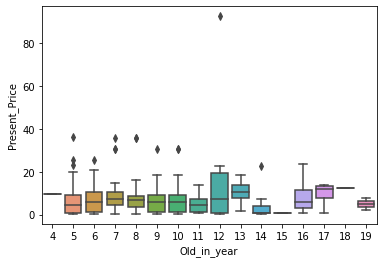

In [28]:
ax = sns.boxplot(x="Old_in_year", y="Present_Price", data=dataset)

## Encoding categorical data

Handeling fuel type

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder = 'passthrough')
x= np.array(ct.fit_transform(x))

In [14]:
x


array([[0.0, 0.0, 1.0, ..., 27000, 'Dealer', 'Manual'],
       [0.0, 1.0, 0.0, ..., 43000, 'Dealer', 'Manual'],
       [0.0, 0.0, 1.0, ..., 6900, 'Dealer', 'Manual'],
       ...,
       [0.0, 0.0, 1.0, ..., 87934, 'Dealer', 'Manual'],
       [0.0, 1.0, 0.0, ..., 9000, 'Dealer', 'Manual'],
       [0.0, 0.0, 1.0, ..., 5464, 'Dealer', 'Manual']], dtype=object)

handeling seller type

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[: , 7]= le.fit_transform(x[: , 7])

In [16]:
print(x[: , 7])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[: , 8]= le.fit_transform(x[: , 8])

In [18]:
x[: , 8]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)



LinearRegression()

In [31]:
print("Slopes:- ", regressor.coef_)
print("Intercept :- ", regressor.intercept_)

Slopes:-  [-5.48964569e-03 -4.97881282e-03  1.04684585e-02  7.98956721e-03
 -1.50028266e-02  9.63757184e-03  1.61636111e-08  7.11010479e-02
 -7.41383262e-02]
Intercept :-  -0.00828537216622801
